In [35]:
from lab.postprocessing.toolbox import load_model
model ,loader = load_model("/home/iailab36/aliakbar/rnn-cnn/scripts/results/cifar/resnet/resnet_RNN_dim_10_rec_2/","0718-121833",device='cpu')
# model_mlp ,loader_1 = load_model("/home/iailab36/aliakbar/rnn-cnn/scripts/results/cifar/resnet/resnet_RNN_dim_10_rec_2/","0718-121833")

Files already downloaded and verified


In [36]:
## new model for getting output before fc layer for Tsne visualization
import torch
a= (list(model.children())[0])
b=(list(a.children())[:7])
f = torch.nn.Sequential(*b)
f = f.to("cpu")


In [38]:
all_features = []
all_features = torch.tensor(all_features)
f_steps = []
f_steps = torch.tensor(f_steps)
all_labels = []
all_labels = torch.tensor(all_labels)
all_logits = []
all_logits = torch.tensor(all_logits)
for batch in loader.valid:
    labels = batch[1]
    input= batch[0].to("cpu")
    features = f(input)
    logits_stacked, final_steps = model(input,False)
    
    all_labels = torch.cat((all_labels,labels),0)
    f_steps = torch.cat((f_steps,final_steps),0)
    all_features = torch.cat((all_features,features),0)
    all_logits = torch.cat((all_logits,logits_stacked),1)
print(all_features.size())
all_features = torch.flatten(all_features, 1)


torch.Size([5000, 512, 1, 1])


In [39]:
prediction = model.get_final_logits(all_logits,f_steps.type(torch.long))
prediction = torch.argmax(prediction,dim=1)
resul = prediction == all_labels

In [40]:
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit_transform(all_features.cpu())
# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))

    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)

    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range

# extract x and y coordinates representing the positions of the images on T-SNE plot
tx = tsne[:, 0]
ty = tsne[:, 1]

# tx = scale_to_01_range(tx)
# ty = scale_to_01_range(ty)

/home/iailab36/aliakbar/env/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/iailab36/aliakbar/env/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [35]:
all_labels.numpy().astype(int)

array([6, 0, 2, ..., 3, 8, 1])

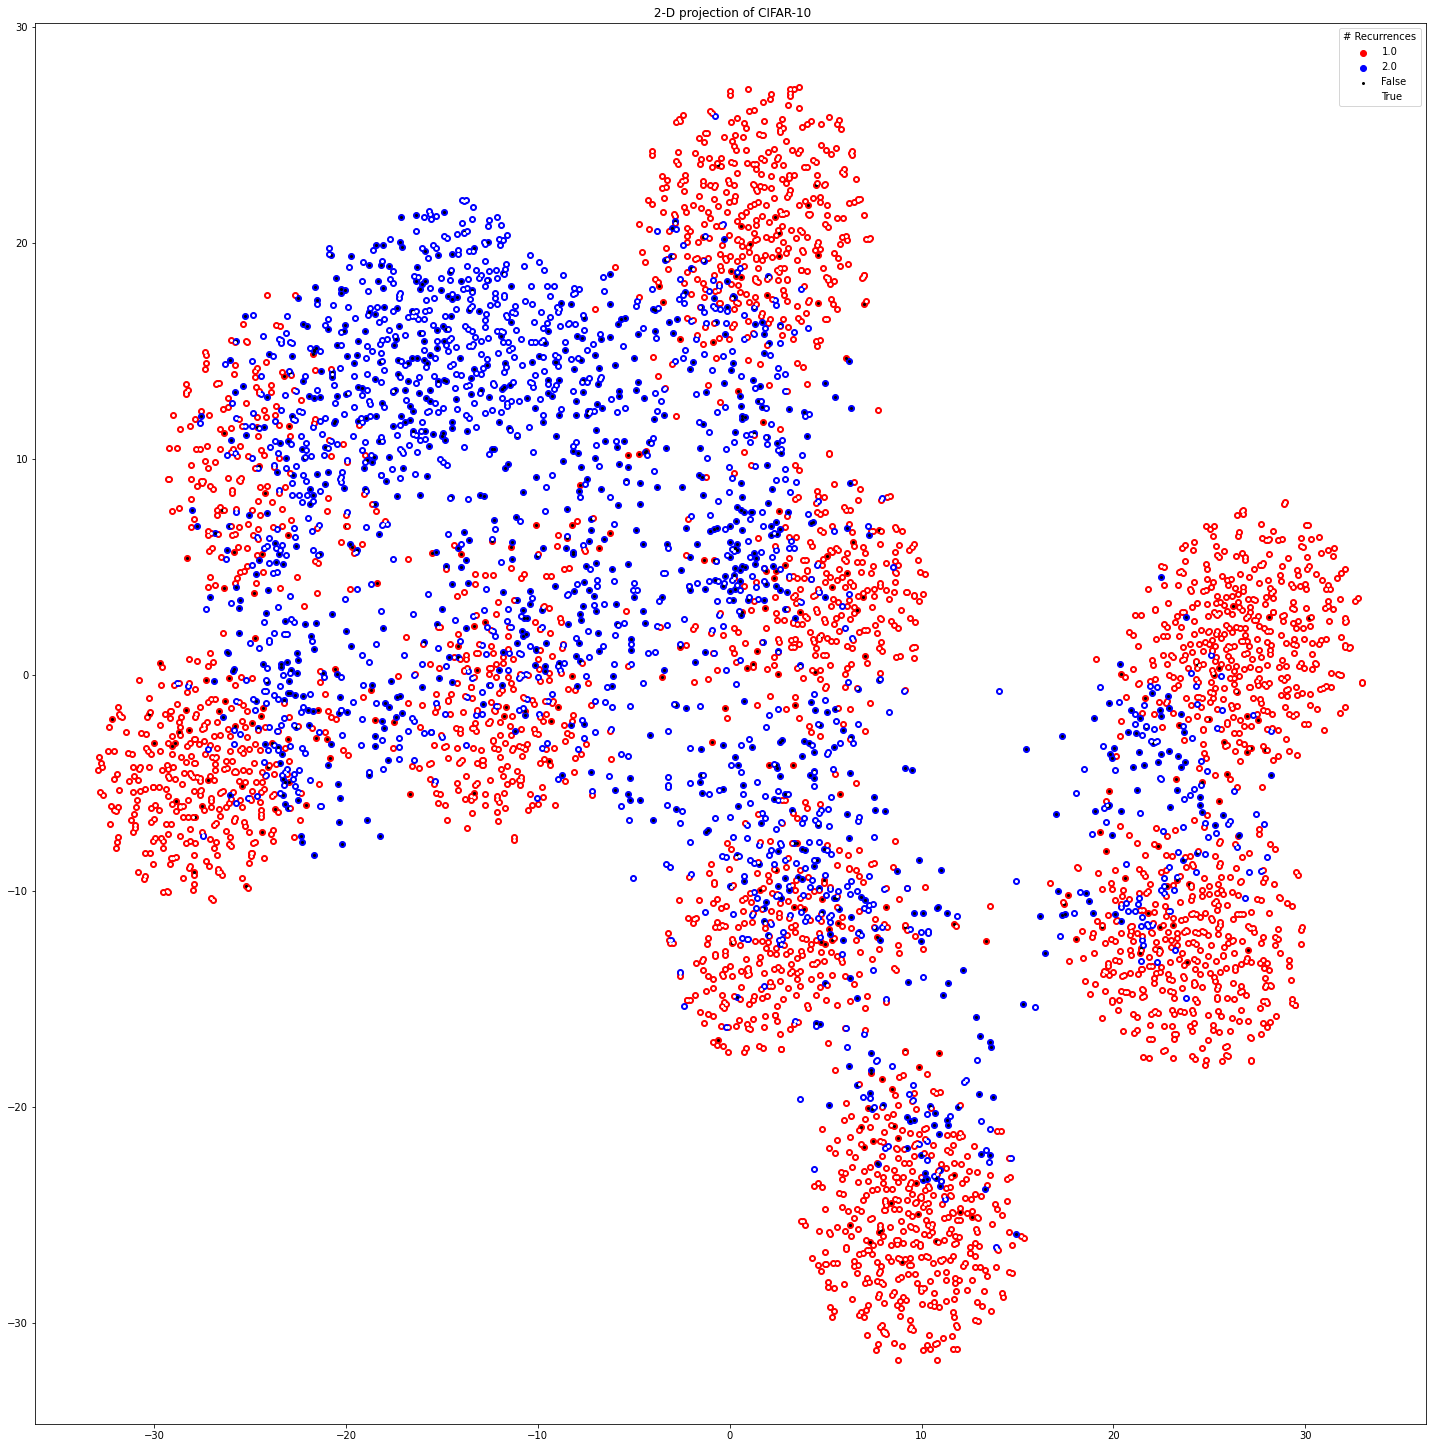

In [46]:
from matplotlib import pyplot as plt
# import plotly.express as px
# fig = px.scatter(tx, ty, color=final_steps.cpu())
# fig.show()


# plt.figure( figsize=(15,15) )
# plt.scatter(tx, ty, c=f_steps.cpu())
# plt.legend(("rec1","rec2"))
# # plt.show()
cdict = {1: 'red', 2: 'blue'}
cdict2 = {False: 'black', True: 'white'}
f_color = f_steps+1
fig, ax = plt.subplots(figsize=(20, 20))
for g in np.unique(f_color):
    ix = np.where(f_color == g)
    ax.scatter(tx[ix], ty[ix], c = cdict[g], label = g)
for g in np.unique(resul):
    ix = np.where(resul == g)
    ax.scatter(tx[ix], ty[ix], c = cdict2[g], label = g ,s=4)
ax.legend(title = "# Recurrences")
fig.tight_layout()
plt.title(" 2-D projection of CIFAR-10")
# plt.show()
plt.savefig("2d cifar10 recs rnn.pdf")

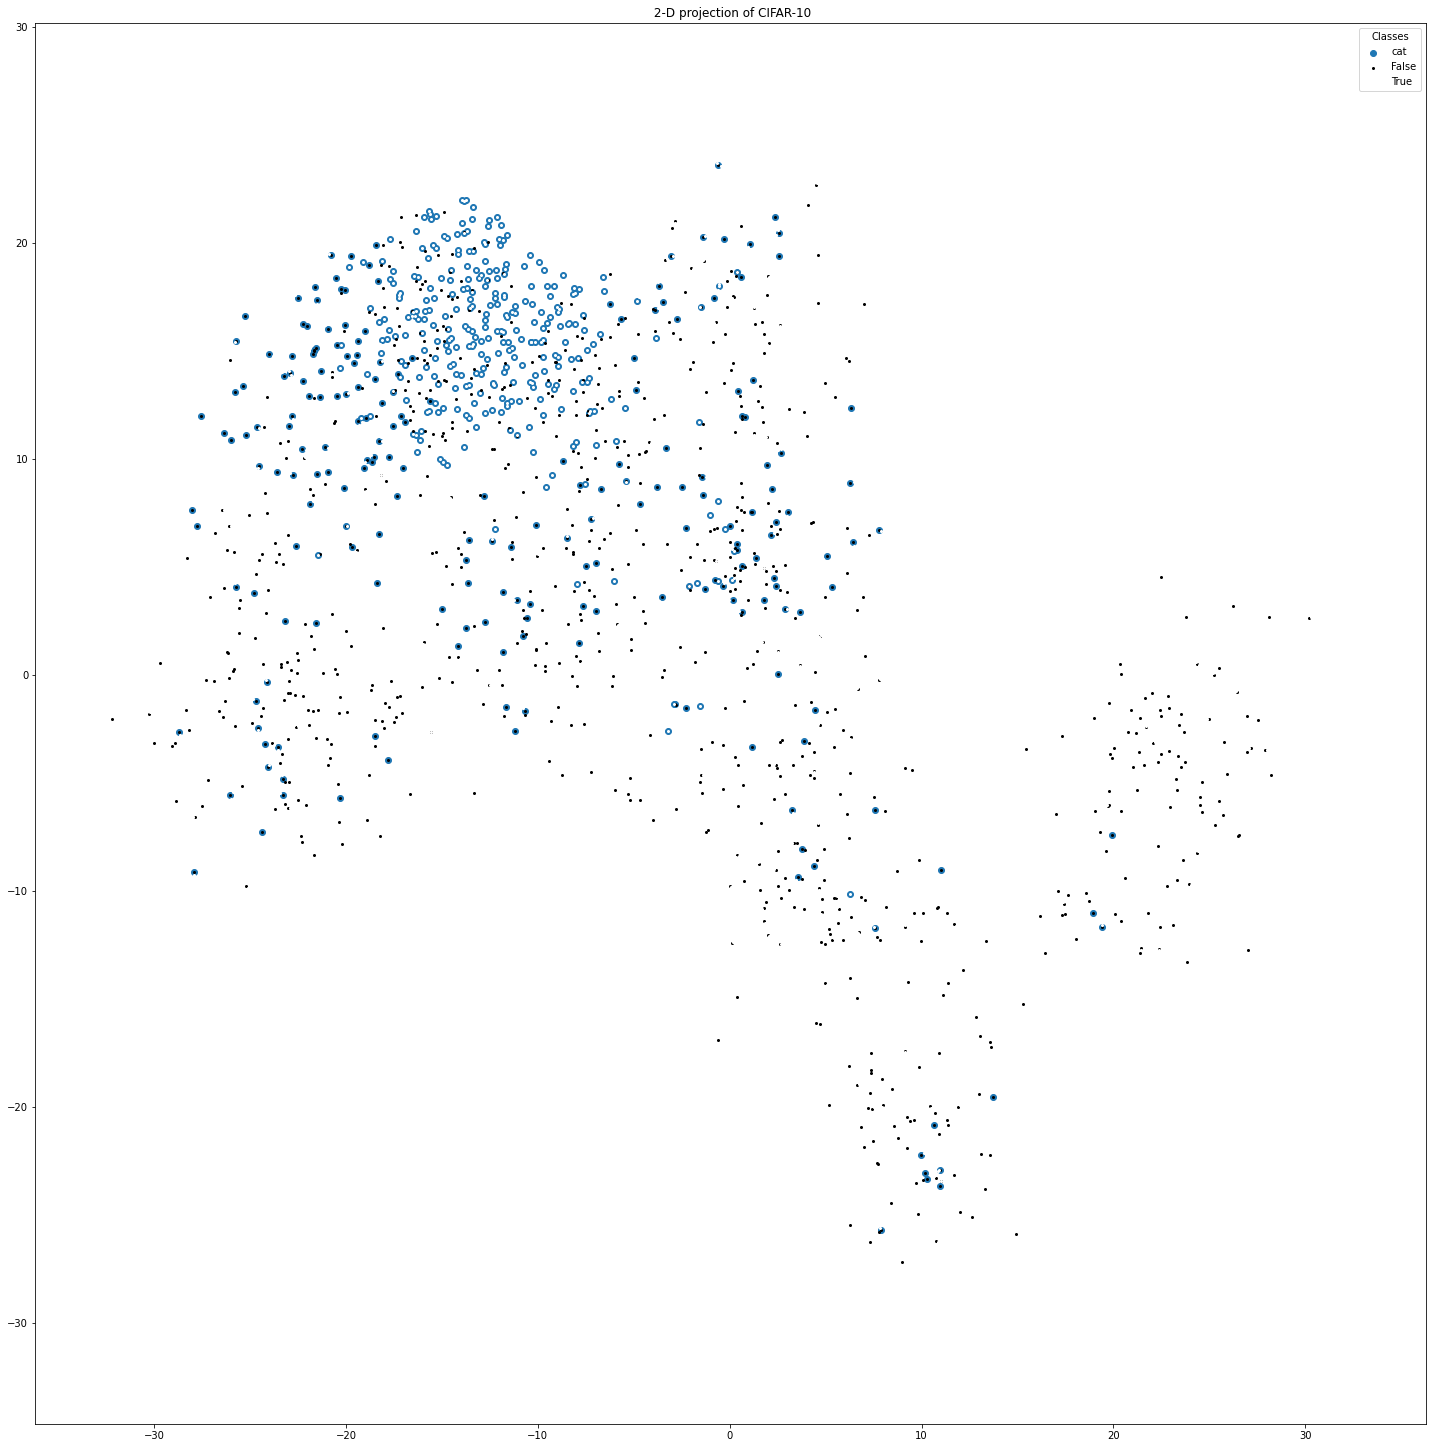

In [59]:
a_labels=all_labels.numpy().astype(int)
label_names= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cdict = {1: 'red', 2: 'blue'}
f_color = f_steps+1
fig, ax = plt.subplots(figsize=(20, 20))
for g in np.unique(a_labels):
    
    ix = np.where(a_labels == g)
    ax.scatter(tx[ix], ty[ix],  label = label_names[g], cmap='tab10')
for g in np.unique(resul):
    ix = np.where(resul == g)
    ax.scatter(tx[ix], ty[ix], c = cdict2[g], label = g ,s=4)
ax.legend(title = "Classes")
fig.tight_layout()
plt.title(" 2-D projection of CIFAR-10")
# plt.show()
plt.savefig("2d cifar10 classes rnn.pdf")

In [ ]:
fs2= all_labels[torch.where(all_f_s == 1)]
count2 =fs2.unique(return_counts=True)

In [88]:
rec_1=logits_stacked[0]
rec_2=logits_stacked[1]
rec_1.size()[0]

128

In [95]:

prediction_1 = torch.argmax(rec_1,dim=1, keepdim=True)
actuals_1= (batch[1].view_as(prediction_1))
pred_labels_1 = prediction_1.cpu().reshape( [128])
eq_1=torch.eq(pred_labels_1,labels)

prediction_2 = torch.argmax(rec_2,dim=1, keepdim=True)
actuals_2= (batch[1].view_as(prediction_2))
pred_labels_2 = prediction_2.cpu().reshape( [128])
eq_2=torch.eq(pred_labels_2,labels)


r = torch.where((eq_1 == True) & (eq_2 == False), torch.tensor(1), torch.tensor(0))
ii =r.nonzero()
imgs = input[ii].reshape([ii.size()[0],3,32,32])
ii

tensor([[22],
        [30],
        [53]])

In [6]:
## right classified after the second recurrence ? 
import torch
imgs = []
imgs = torch.tensor(imgs)
lbs =[]
lbs = torch.tensor(lbs).type(torch.long)
label_names= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for batch in loader.valid:
    labels = batch[1]
    input= batch[0].to("cpu")
    logits_stacked, final_steps = model(input,ret_logits = False)
    rec_1=logits_stacked[0]
    rec_2=logits_stacked[1]
    prediction_1 = torch.argmax(rec_1,dim=1, keepdim=True)
    actuals_1= (batch[1].view_as(prediction_1))
    pred_labels_1 = prediction_1.cpu().reshape( [rec_1.size()[0]])
    eq_1=torch.eq(pred_labels_1,labels)

    prediction_2 = torch.argmax(rec_2,dim=1, keepdim=True)
    actuals_2= (batch[1].view_as(prediction_2))
    pred_labels_2 = prediction_2.cpu().reshape( [rec_1.size()[0]])
    eq_2=torch.eq(pred_labels_2,labels)


#     torch.where((eq_1 == True) & (eq_2 == False), torch.tensor(1), torch.tensor(0))
    r = torch.where((eq_2 == True) & (eq_1 == False), torch.tensor(1), torch.tensor(0))
#     r2 = torch.where((eq_2 == True) & (eq_1 == False), torch.tensor(1), torch.tensor(0))
    
    indicies =r.nonzero()
    img = input[indicies].reshape([indicies.size()[0],3,32,32])
    lb = labels[indicies].reshape([indicies.size()[0]])
#     print(lb.size())
    imgs=torch.cat((imgs,img.cpu()),0)
#     imgs.append(img.cpu().numpy())
#     b = torch.unsqueeze(b, dim=2)
    lbs=torch.cat([lbs,lb])

In [14]:
all_f_s = []
all_f_s = torch.tensor(all_f_s)
all_labels =[]
all_labels = torch.tensor(all_labels).type(torch.long)
label_names= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for batch in loader.valid:
    labels = batch[1]
    input= batch[0].to("cpu")
    logits_stacked, final_steps = model(input,ret_logits = False)
    all_labels = torch.cat((all_labels,labels),0)
    all_f_s = torch.cat((all_f_s,final_steps),0)


In [19]:
fs2= all_labels[torch.where(all_f_s == 1)]
count2 =fs2.unique(return_counts=True)


In [34]:
count2[1]/fs2.size()[0]*100


tensor([ 9.3234,  2.5573, 11.1348, 24.7736, 11.0282, 16.5157,  7.4587,  7.4587,
         3.9425,  5.8071])

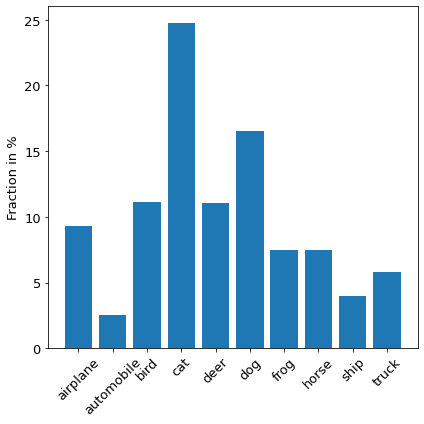

In [58]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.bar(label_names, count2[1]/fs2.size()[0]*100)
plt.xticks(rotation=45)

plt.xticks(fontsize=13 )
plt.yticks(fontsize=13 )
plt.ylabel("Fraction in %", fontsize=13)
fig.tight_layout()
plt.savefig("class dist rec2 rnn.pdf")

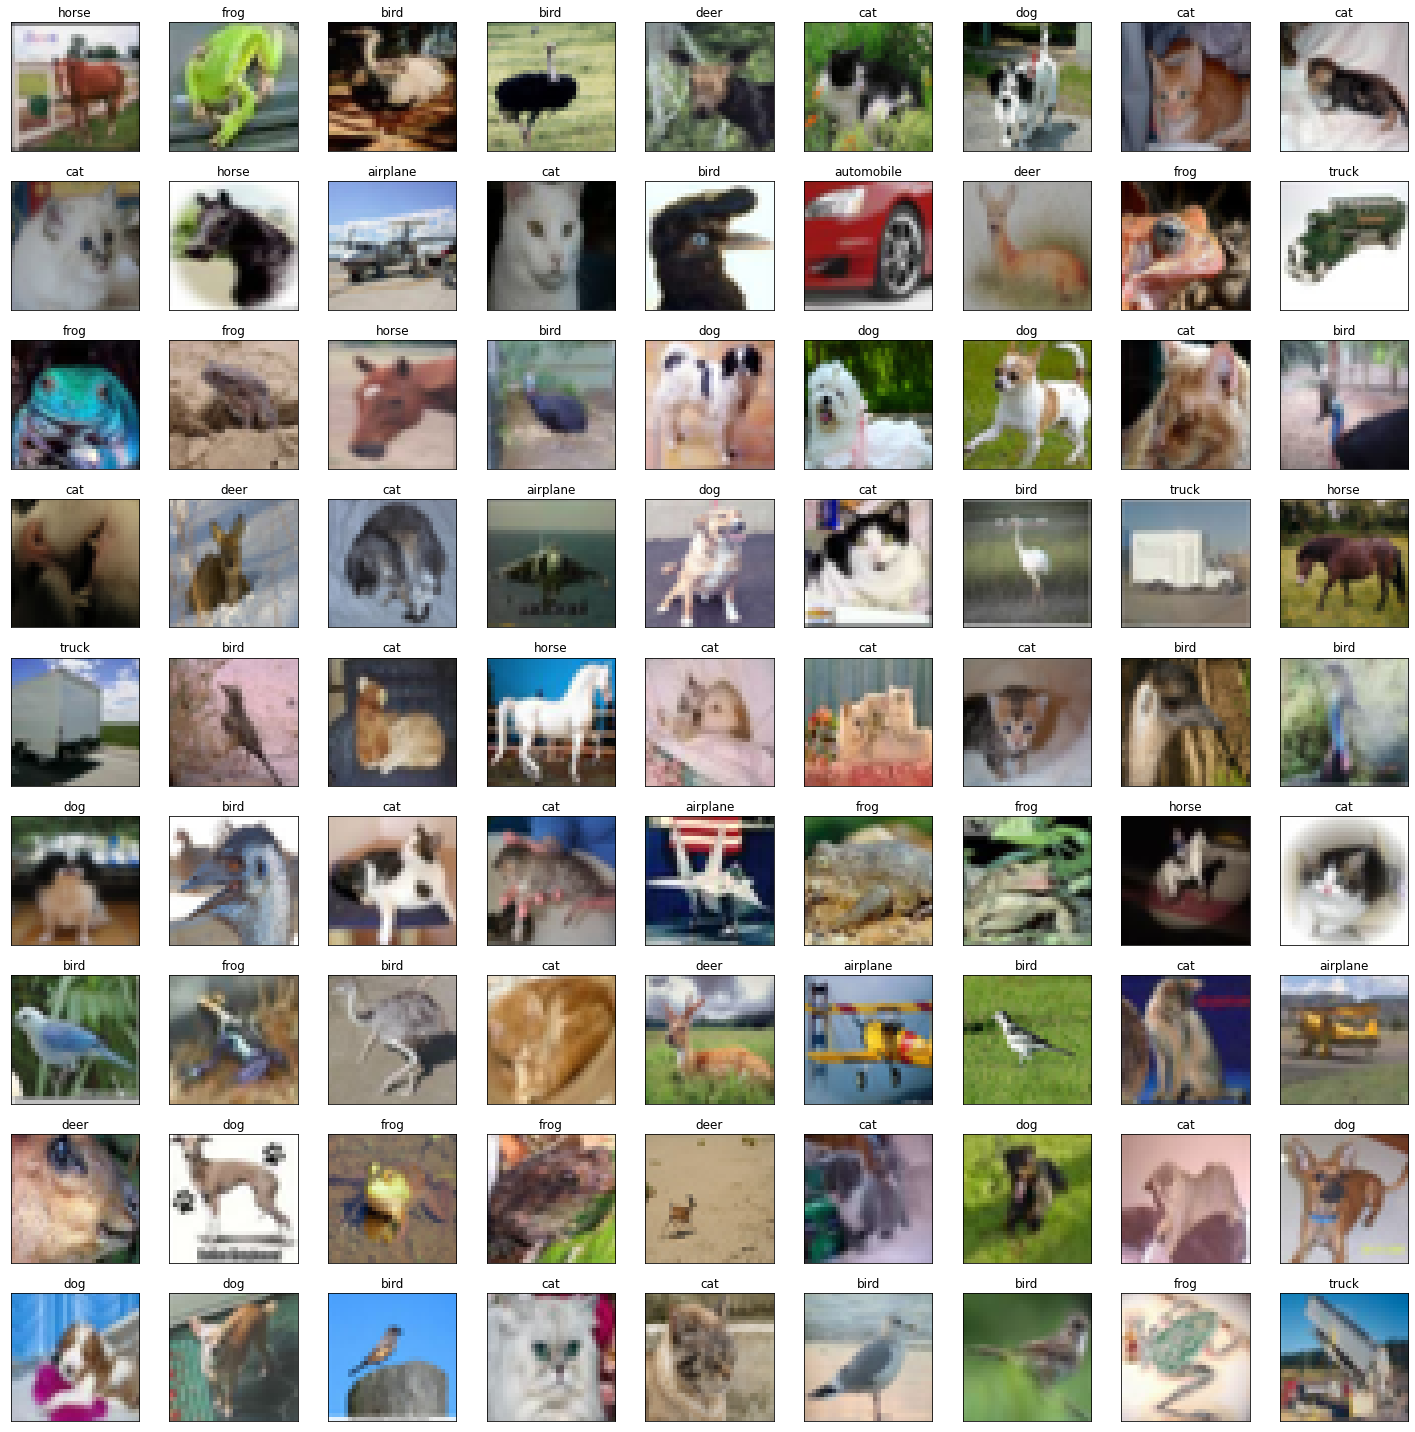

In [52]:
import numpy as np
import matplotlib.pyplot as plt

images = imgs.numpy()
images = images.reshape(len(images),3,32,32).transpose(0,2,3,1)
rows, columns = 9, 9
fig=plt.figure(figsize=(20, 20))
# visualize these random images
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])
    plt.xticks([])
    plt.yticks([])
    plt.title("{}"
          .format(label_names[lbs.numpy()[i-1]]))
fig.tight_layout()
plt.show()

